In [1]:
import pandas as pd
import re

In [2]:
real_estate_df = pd.read_csv("real_estate_data_chicago.csv")

In [3]:
real_estate_df

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,single_family,WEST ELSDON BRICK SINGLE FAMILY RAISED RANCH H...,1961.0,3.0,2.0,2.0,NaN,2.0,NaN,2080.0,1.0,148000.0,2000-09-15,319900.0,for_sale
1996,condos,Welcome to your spacious three bedroom condo i...,1962.0,3.0,2.0,2.0,NaN,1.0,NaN,1498.0,27.0,NaN,NaN,260000.0,for_sale
1997,condos,Luxury Residence with jaw dropping City and Ri...,2002.0,3.0,3.0,2.0,1.0,3.0,NaN,3700.0,37.0,1705000.0,2016-06-03,1449000.0,for_sale
1998,multi_family,"Welcome to this charming & RARE, meticulously ...",1946.0,6.0,5.0,5.0,NaN,2.0,6200.0,3654.0,NaN,NaN,NaN,749000.0,for_sale


In [4]:
ACS_df = pd.read_csv("ACS_5_Year_Data_by_Community_Area.csv")

In [5]:
ACS_df

,ACS Year,Community Area,"Under $25,000","$25,000 to $49,999","$50,000 to $74,999","$75,000 to $125,000","$125,000 +",Male 0 to 17,Male 18 to 24,Male 25 to 34,...,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Pacific Islander,Other Race,Multiracial,White Not Hispanic or Latino,Hispanic or Latino,Record ID
0,2023,ALBANY PARK,1269,1916,1801,2306,3379,4799,2955,4513,...,21496,2228,759,7124,1,7888,8334,16115,21108,2023_ALBANY PARK
1,2023,ARCHER HEIGHTS,223,752,441,795,739,1927,732,1102,...,6232,10,108,679,0,3705,3142,2043,11097,2023_ARCHER HEIGHTS
2,2023,ARMOUR SQUARE,701,798,370,637,597,1300,487,871,...,2556,1487,107,8402,61,212,325,2226,565,2023_ARMOUR SQUARE
3,2023,ASHBURN,797,1351,1985,3014,2735,5150,1964,2881,...,11297,18124,697,436,0,7772,4517,3774,19917,2023_ASHBURN
4,2023,AUBURN GRESHAM,2541,2451,1592,2202,1850,5803,1836,2964,...,760,43414,119,399,0,993,798,491,1577,2023_AUBURN GRESHAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2023,WEST LAWN,766,1224,1296,1909,1777,4673,1865,2004,...,13717,929,585,255,171,10645,6149,3980,27275,2023_WEST LAWN
73,2023,WEST PULLMAN,1380,1196,850,1273,1158,3160,1306,1515,...,908,22426,0,0,0,790,1035,289,1856,2023_WEST PULLMAN
74,2023,WEST RIDGE,2088,3577,3031,4005,5327,10747,3219,5519,...,36943,9310,681,16696,17,6958,8615,31486,17531,2023_WEST RIDGE
75,2023,WEST TOWN,1051,1114,1197,2506,10663,5722,2592,16967,...,61759,6039,147,5138,21,4650,8700,54505,17099,2023_WEST TOWN


In [6]:
areas = ACS_df["Community Area"].dropna().astype(str).str.strip().unique().tolist()

In [7]:
pat = re.compile(r"\b(" + "|".join(map(re.escape, areas)) + r")\b", flags=re.IGNORECASE)
canon = {a.lower(): a for a in areas}

In [8]:
def extract_area(s: str):
    if isinstance(s, str):
        m = pat.search(s)
        if m:
            return canon.get(m.group(1).lower())
    return None

In [9]:
real_estate_df["Community Area"] = real_estate_df["text"].apply(extract_area)

In [10]:
real_estate_df["listPrice"] = (
    real_estate_df["listPrice"]
      .astype(str)
      .str.replace(r"[\$,]", "", regex=True)
      .pipe(pd.to_numeric, errors="coerce")
)

In [11]:
listings_enriched = real_estate_df.merge(ACS_df, on="Community Area", how="left")

print("Rows (listings_enriched):", len(listings_enriched))
print("Price:", listings_enriched["listPrice"].dtype)
print("Mapped areas:", listings_enriched["Community Area"].notna().sum())

Rows (listings_enriched): 2000
Price: float64
Mapped areas: 886


In [12]:
listings_enriched

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,...,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Pacific Islander,Other Race,Multiracial,White Not Hispanic or Latino,Hispanic or Latino,Record ID
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,...,17017.0,344.0,16.0,202.0,0.0,356.0,1172.0,16041.0,1834.0,2023_MOUNT GREENWOOD
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,...,2813.0,21948.0,123.0,125.0,0.0,2986.0,1077.0,947.0,5604.0,2023_SOUTH CHICAGO
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,single_family,WEST ELSDON BRICK SINGLE FAMILY RAISED RANCH H...,1961.0,3.0,2.0,2.0,NaN,2.0,NaN,2080.0,...,7800.0,128.0,749.0,688.0,0.0,5056.0,3780.0,2606.0,14781.0,2023_WEST ELSDON
1996,condos,Welcome to your spacious three bedroom condo i...,1962.0,3.0,2.0,2.0,NaN,1.0,NaN,1498.0,...,11509.0,6143.0,49.0,3763.0,0.0,604.0,2024.0,10805.0,1762.0,2023_HYDE PARK
1997,condos,Luxury Residence with jaw dropping City and Ri...,2002.0,3.0,3.0,2.0,1.0,3.0,NaN,3700.0,...,22509.0,3120.0,367.0,8849.0,0.0,1016.0,2424.0,20573.0,4297.0,2023_LOOP
1998,multi_family,"Welcome to this charming & RARE, meticulously ...",1946.0,6.0,5.0,5.0,NaN,2.0,6200.0,3654.0,...,10185.0,532.0,153.0,6058.0,0.0,904.0,1426.0,8578.0,3398.0,2023_NORTH PARK


In [13]:
community_summary = (
    listings_enriched
      .dropna(subset=["Community Area", "listPrice"])
      .groupby("Community Area", as_index=False)
      .agg(
          n_listings=("listPrice", "size"),
          median_listing_price=("listPrice", "median"),
          mean_listing_price=("listPrice", "mean")
      )
)

In [14]:
final_summary = community_summary.merge(ACS_df, on="Community Area", how="left")

print("Rows (final_summary):", len(final_summary))
print(final_summary.head())

Rows (final_summary): 66
   Community Area  n_listings  median_listing_price  mean_listing_price  \
0     ALBANY PARK          11              350000.0       553863.636364   
1  ARCHER HEIGHTS           1              349000.0       349000.000000   
2         ASHBURN           5              241000.0       254174.600000   
3  AUBURN GRESHAM           4              149000.0       164450.000000   
4          AUSTIN          14              239450.0       262907.071429   

   ACS Year  Under $25,000  $25,000 to $49,999  $50,000 to $74,999  \
0      2023           1269                1916                1801   
1      2023            223                 752                 441   
2      2023            797                1351                1985   
3      2023           2541                2451                1592   
4      2023           5506                5084                3600   

   $75,000 to $125,000  $125,000 +  ...  White  Black or African American  \
0                 2306    

IMPORTANT

In [15]:
final_summary.head(n=60)

,Community Area,n_listings,median_listing_price,mean_listing_price,ACS Year,"Under $25,000","$25,000 to $49,999","$50,000 to $74,999","$75,000 to $125,000","$125,000 +",...,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Pacific Islander,Other Race,Multiracial,White Not Hispanic or Latino,Hispanic or Latino,Record ID
0,ALBANY PARK,11,350000.0,5.538636e+05,2023,1269,1916,1801,2306,3379,...,21496,2228,759,7124,1,7888,8334,16115,21108,2023_ALBANY PARK
1,ARCHER HEIGHTS,1,349000.0,3.490000e+05,2023,223,752,441,795,739,...,6232,10,108,679,0,3705,3142,2043,11097,2023_ARCHER HEIGHTS
2,ASHBURN,5,241000.0,2.541746e+05,2023,797,1351,1985,3014,2735,...,11297,18124,697,436,0,7772,4517,3774,19917,2023_ASHBURN
3,AUBURN GRESHAM,4,149000.0,1.644500e+05,2023,2541,2451,1592,2202,1850,...,760,43414,119,399,0,993,798,491,1577,2023_AUBURN GRESHAM
4,AUSTIN,14,239450.0,2.629071e+05,2023,5506,5084,3600,4047,3725,...,10447,73602,531,678,21,8512,6487,5386,19591,2023_AUSTIN
5,AVALON PARK,4,294450.0,2.809500e+05,2023,420,489,356,518,630,...,27,8924,0,65,0,265,211,27,48,2023_AVALON PARK
6,AVONDALE,10,432000.0,4.345200e+05,2023,689,1191,1106,1726,3059,...,19289,927,263,1750,15,7809,6297,13718,18606,2023_AVONDALE
7,BELMONT CRAGIN,3,329900.0,3.466000e+05,2023,1585,3843,3031,4588,3299,...,27909,3370,993,1939,23,25743,14011,10782,57511,2023_BELMONT CRAGIN
8,BEVERLY,43,375000.0,4.642163e+05,2023,160,294,355,1074,3255,...,11330,6671,9,176,23,276,1327,10974,1389,2023_BEVERLY
9,BRIDGEPORT,17,559999.0,5.383764e+05,2023,1123,1450,1043,1634,2572,...,13410,991,152,13234,0,2751,2475,11334,6879,2023_BRIDGEPORT


So at first I merged the Community Area to the Text and then I thought. Wait. Those merges wouldn't work because then it would merge one to one. But that's not what I'm trying to do. I want to merge multiple listings under The community Area. So I did exactly that.

In [16]:
# These are the basic shapes

re_shape = real_estate_df.shape
acs_shape = ACS_df.shape

In [17]:
# Duplicates 

re_dupes = real_estate_df.duplicated().sum()
acs_dupes = ACS_df.duplicated().sum()

In [18]:
# Ammount of Community Areas

re_areas = real_estate_df["Community Area"].dropna().nunique()
acs_areas = ACS_df["Community Area"].dropna().nunique()

In [19]:
print("Real estate rows, columns :", re_shape)
print("ACS rows, columns:", acs_shape)
print("Real estate duplicates:", re_dupes)
print("ACS duplicates:", acs_dupes)
print("Listings mapped to a Community Area (unique areas):", re_areas)
print("ACS unique community areas:", acs_areas)

Real estate rows, columns : (2000, 16)
ACS rows, columns: (77, 30)
Real estate duplicates: 2
ACS duplicates: 0
Listings mapped to a Community Area (unique areas): 67
ACS unique community areas: 77


In [20]:
income_midpoints = {
    "Under $25,000": 12500,
    "$25,000 to $49,999": 37500,
    "$50,000 to $74,999": 62500,
    "$75,000 to $125,000": 100000,
    "$125,000 +": 150000
}

for col in income_midpoints.keys():
    ACS_df[col] = pd.to_numeric(ACS_df[col], errors="coerce")

numerator = sum(ACS_df[col] * income_midpoints[col] for col in income_midpoints)
denominator = sum(ACS_df[col] for col in income_midpoints)
ACS_df["median_income_made"] = numerator / denominator

In [21]:
import numpy as np

In [22]:
listings_enriched["listPrice"] = (
    listings_enriched["listPrice"].astype(str)
    .str.replace(r"[\$,]", "", regex=True)
    .pipe(pd.to_numeric, errors="coerce")
)

In [23]:
community_summary = (
    listings_enriched
      .dropna(subset=["Community Area", "listPrice"])
      .groupby("Community Area", as_index=False)
      .agg(
          n_listings=("listPrice", "size"),
          median_listing_price=("listPrice", "median"),
          mean_listing_price=("listPrice", "mean")
      )
      .merge(ACS_df[["Community Area", "median_income_made"]], on="Community Area", how="left")
)

community_summary = community_summary.rename(columns={"median_income_made": "median_income"})

In [24]:
community_summary["price_to_income"] = (
    community_summary["median_listing_price"] / community_summary["median_income"]
)

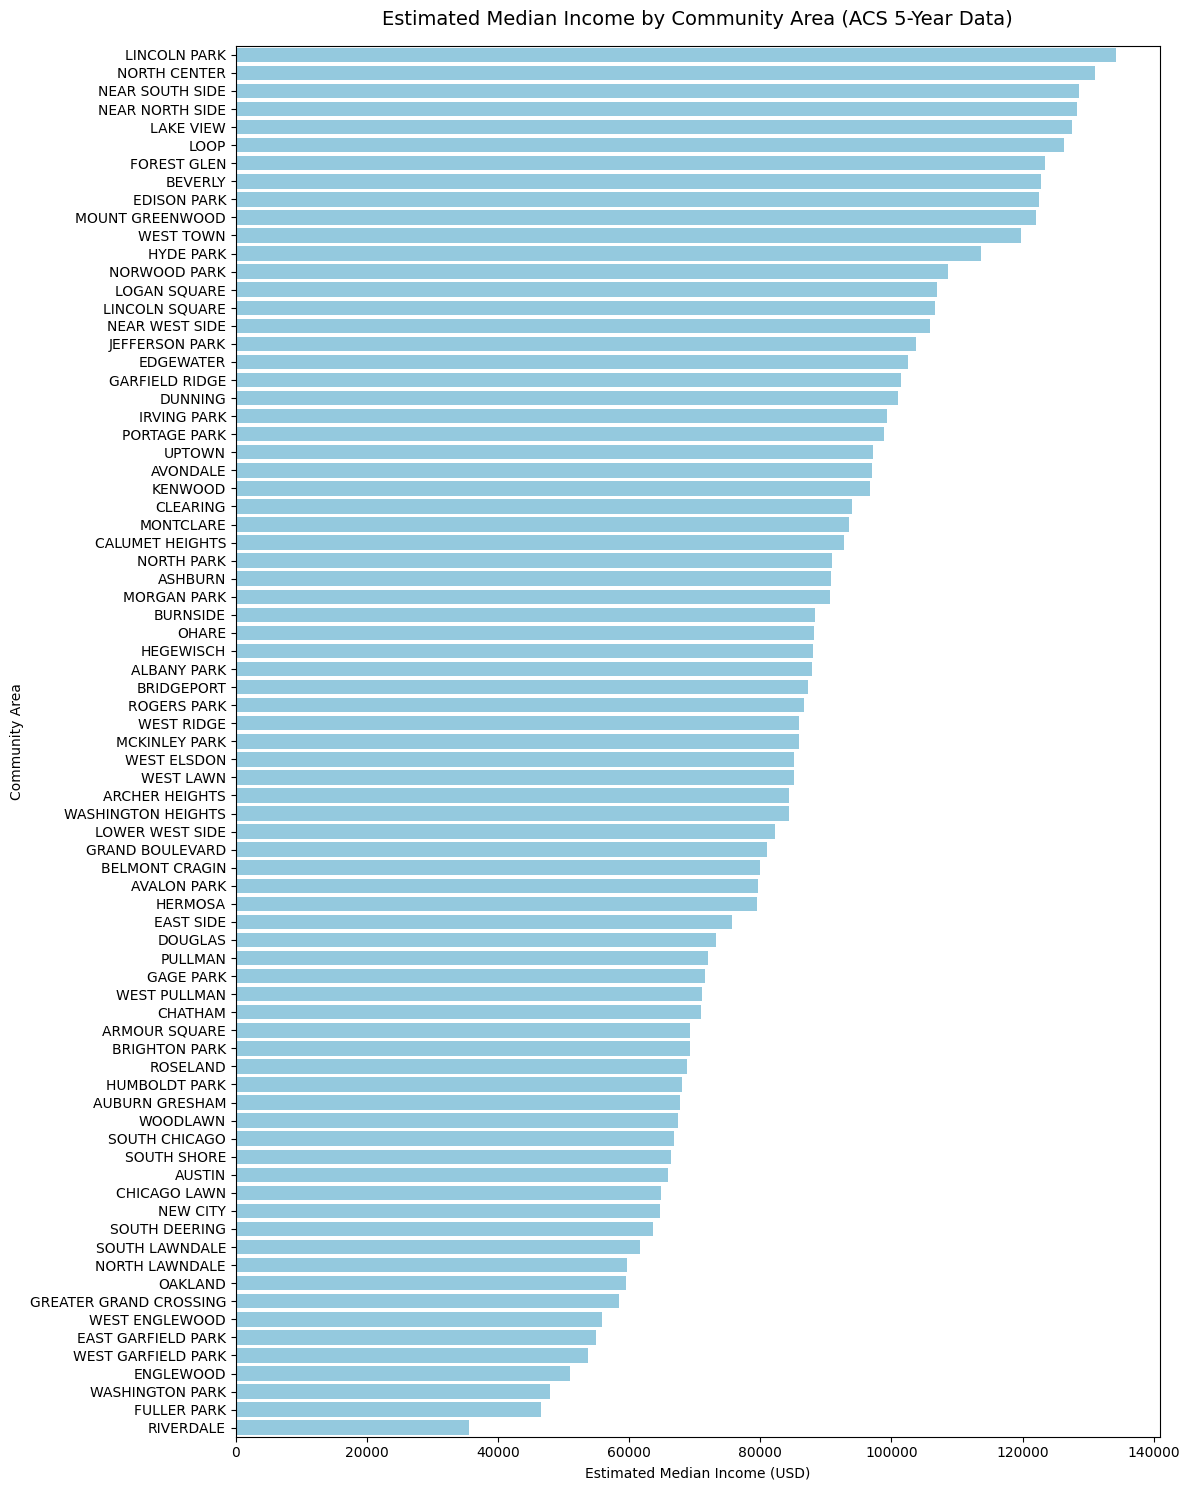

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

ACS_sorted = ACS_df.sort_values("median_income_made", ascending=False)

plt.figure(figsize=(12, 15))
sns.barplot(
    data=ACS_sorted,
    x="median_income_made",
    y="Community Area",
    color="skyblue"
)

plt.title("Estimated Median Income by Community Area (ACS 5-Year Data)", fontsize=14, pad=15)
plt.xlabel("Estimated Median Income (USD)")
plt.ylabel("Community Area")
plt.tight_layout()
plt.show()


A horizontal bar chart ranking all 77 Chicago community areas by their estimated median income proxy (using the weighted midpoint calculation).

In [26]:
community_summary["price_to_income"] = (
    community_summary["median_listing_price"] / community_summary["median_income"]
)

top5 = community_summary.sort_values("price_to_income", ascending=False).head(5)
bottom5 = community_summary.sort_values("price_to_income", ascending=True).head(5)

print("Top 5 (least affordable):\n", top5[["Community Area","median_listing_price","median_income","price_to_income"]])
print("Top 5 (most affordable):\n", bottom5[["Community Area","median_listing_price","median_income","price_to_income"]])


Top 5 (least affordable):
    Community Area  median_listing_price  median_income  price_to_income
28  HUMBOLDT PARK              589450.0   68002.467380         8.668068
47        OAKLAND              454000.0   59483.173077         7.632411
27        HERMOSA              597500.0   79531.070196         7.512787
64      WEST TOWN              850000.0  119761.357450         7.097448
14        DOUGLAS              517000.0   73307.379824         7.052496
Top 5 (most affordable):
             Community Area  median_listing_price  median_income  \
22             FULLER PARK               25000.0   46540.697674   
20               ENGLEWOOD               55000.0   51031.353135   
25  GREATER GRAND CROSSING               79400.0   58378.398678   
52                ROSELAND               95000.0   68879.350894   
59          WEST ENGLEWOOD               99900.0   55826.534232   

    price_to_income  
22         0.537164  
20         1.077769  
25         1.360092  
52         1.379223  
59

In [27]:
community_summary.head(n=60)

,Community Area,n_listings,median_listing_price,mean_listing_price,median_income,price_to_income
0,ALBANY PARK,11,350000.0,5.538636e+05,87876.019117,3.982884
1,ARCHER HEIGHTS,1,349000.0,3.490000e+05,84372.881356,4.136400
2,ASHBURN,5,241000.0,2.541746e+05,90704.057883,2.656992
3,AUBURN GRESHAM,4,149000.0,1.644500e+05,67776.889808,2.198389
4,AUSTIN,14,239450.0,2.629071e+05,65928.649485,3.631957
5,AVALON PARK,4,294450.0,2.809500e+05,79625.984252,3.697913
6,AVONDALE,10,432000.0,4.345200e+05,97008.107065,4.453236
7,BELMONT CRAGIN,3,329900.0,3.466000e+05,79959.164322,4.125856
8,BEVERLY,43,375000.0,4.642163e+05,122783.670689,3.054152
9,BRIDGEPORT,17,559999.0,5.383764e+05,87292.252621,6.415220


In [28]:
final_summary.head(n=60)

,Community Area,n_listings,median_listing_price,mean_listing_price,ACS Year,"Under $25,000","$25,000 to $49,999","$50,000 to $74,999","$75,000 to $125,000","$125,000 +",...,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Pacific Islander,Other Race,Multiracial,White Not Hispanic or Latino,Hispanic or Latino,Record ID
0,ALBANY PARK,11,350000.0,5.538636e+05,2023,1269,1916,1801,2306,3379,...,21496,2228,759,7124,1,7888,8334,16115,21108,2023_ALBANY PARK
1,ARCHER HEIGHTS,1,349000.0,3.490000e+05,2023,223,752,441,795,739,...,6232,10,108,679,0,3705,3142,2043,11097,2023_ARCHER HEIGHTS
2,ASHBURN,5,241000.0,2.541746e+05,2023,797,1351,1985,3014,2735,...,11297,18124,697,436,0,7772,4517,3774,19917,2023_ASHBURN
3,AUBURN GRESHAM,4,149000.0,1.644500e+05,2023,2541,2451,1592,2202,1850,...,760,43414,119,399,0,993,798,491,1577,2023_AUBURN GRESHAM
4,AUSTIN,14,239450.0,2.629071e+05,2023,5506,5084,3600,4047,3725,...,10447,73602,531,678,21,8512,6487,5386,19591,2023_AUSTIN
5,AVALON PARK,4,294450.0,2.809500e+05,2023,420,489,356,518,630,...,27,8924,0,65,0,265,211,27,48,2023_AVALON PARK
6,AVONDALE,10,432000.0,4.345200e+05,2023,689,1191,1106,1726,3059,...,19289,927,263,1750,15,7809,6297,13718,18606,2023_AVONDALE
7,BELMONT CRAGIN,3,329900.0,3.466000e+05,2023,1585,3843,3031,4588,3299,...,27909,3370,993,1939,23,25743,14011,10782,57511,2023_BELMONT CRAGIN
8,BEVERLY,43,375000.0,4.642163e+05,2023,160,294,355,1074,3255,...,11330,6671,9,176,23,276,1327,10974,1389,2023_BEVERLY
9,BRIDGEPORT,17,559999.0,5.383764e+05,2023,1123,1450,1043,1634,2572,...,13410,991,152,13234,0,2751,2475,11334,6879,2023_BRIDGEPORT


In [29]:
import nbformat

with open("IS477CourseProject.ipynb") as f:
    nb = nbformat.read(f, as_version=4)

for i, cell in enumerate(nb.cells):
    cell_type = cell["cell_type"]
    preview = cell["source"][:250].replace("\n", " ")
    print(f"\n--- Cell {i} ({cell_type}) ---")
    print(preview)



--- Cell 0 (code) ---
import pandas as pd import re

--- Cell 1 (code) ---
real_estate_df = pd.read_csv("real_estate_data_chicago.csv")

--- Cell 2 (code) ---
real_estate_df

--- Cell 3 (code) ---
ACS_df = pd.read_csv("ACS_5_Year_Data_by_Community_Area.csv")

--- Cell 4 (code) ---
ACS_df

--- Cell 5 (code) ---
areas = ACS_df["Community Area"].dropna().astype(str).str.strip().unique().tolist()

--- Cell 6 (code) ---
pat = re.compile(r"\b(" + "|".join(map(re.escape, areas)) + r")\b", flags=re.IGNORECASE) canon = {a.lower(): a for a in areas}

--- Cell 7 (code) ---
def extract_area(s: str):     if isinstance(s, str):         m = pat.search(s)         if m:             return canon.get(m.group(1).lower())     return None

--- Cell 8 (code) ---
real_estate_df["Community Area"] = real_estate_df["text"].apply(extract_area)

--- Cell 9 (code) ---
real_estate_df["listPrice"] = (     real_estate_df["listPrice"]       .astype(str)       .str.replace(r"[\$,]", "", regex=True)       .pipe(pd.to_nu